# Welcome to My Notebook

#### It's with immense pleasure to present this project to you.
##### ⚠️Please, as you go through my project, comments and suggestions for improvement are more than welcome!

In [252]:
# Initial necessary imports for my project [other imports are inside the project]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data from my uploaded file to my working directory of this project

In [227]:
dataset = pd.read_csv('loan.csv')

In [228]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [229]:
dataset.shape

(614, 13)

My dataset has 614 rows and 13 columns

In [230]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [231]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Checking Null Values

In [232]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Text(0.5, 1.0, 'Visualizing Null values')

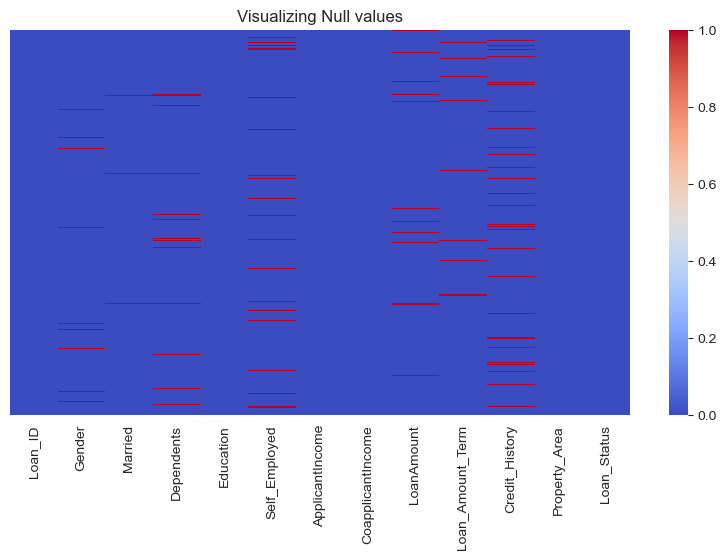

In [241]:
plt.figure(figsize=(10,5))
sns.heatmap(data=dataset.isnull(), yticklabels=False, cmap='coolwarm')
plt.title("Visualizing Null values")

<Axes: title={'center': 'Gender Vs Marrital Status Distribution'}, xlabel='Gender', ylabel='count'>

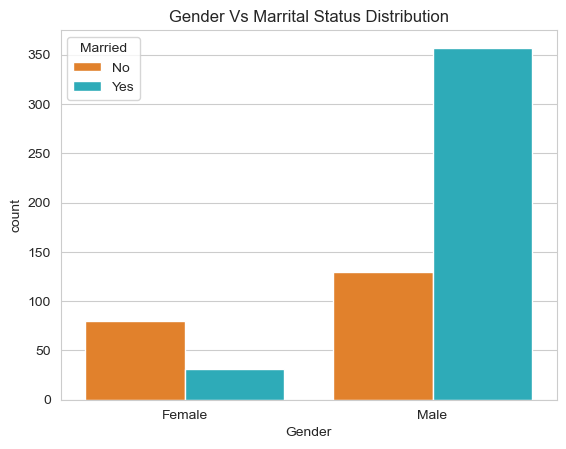

In [242]:
plt.title("Gender Vs Marrital Status Distribution")
custom_palette = {"Yes": "#17becf", "No": "#ff7f0e"}
sns.countplot(data=dataset, x='Gender', hue='Married', palette=custom_palette, order=["Female","Male"])


<Axes: title={'center': 'Gender Vs Employment Status Distribution'}, xlabel='Gender', ylabel='count'>

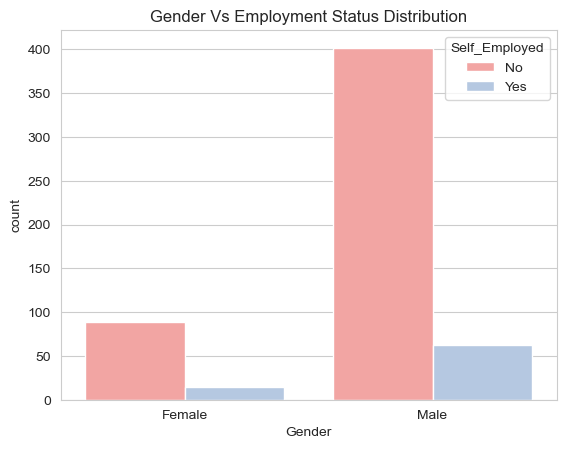

In [243]:
plt.title("Gender Vs Employment Status Distribution")
custom_palette = {"Yes": "#aec7e8", "No": "#ff9896"}
sns.countplot(data=dataset, x='Gender', hue='Self_Employed', palette=custom_palette, order=["Female","Male"])

<Axes: title={'center': 'Gender Vs Loan Status Distribution'}, xlabel='Loan_Status', ylabel='count'>

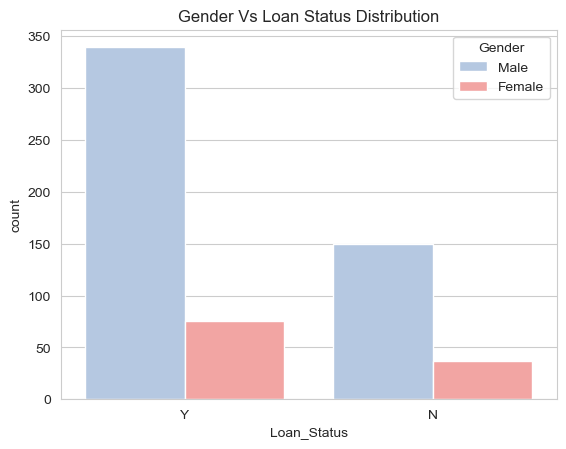

In [244]:
plt.title("Gender Vs Loan Status Distribution")
custom_palette = {"Male": "#aec7e8", "Female": "#ff9896"}
sns.countplot(data=dataset, x='Loan_Status', hue='Gender', palette=custom_palette)

<Axes: title={'center': 'Loan Amount Vs Number_of_Dependents'}, xlabel='Dependents', ylabel='LoanAmount'>

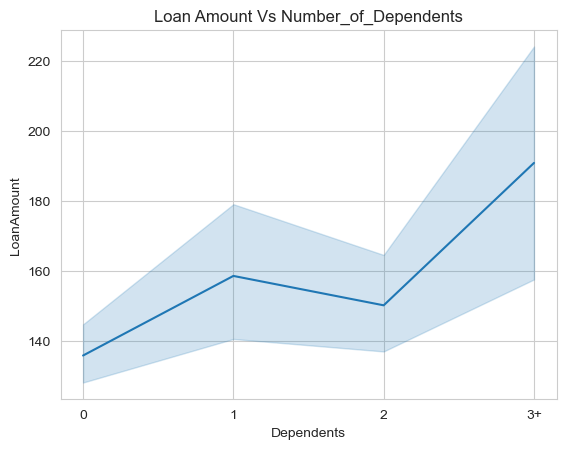

In [245]:
plt.title("Loan Amount Vs Number_of_Dependents")
sns.lineplot(x=dataset['Dependents'].dropna(), y=dataset['LoanAmount'].dropna())

In [246]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


From the cross-tabulation table, it can be seen that people with higher credit history "1.0" got a lot of loan approval, comparing to their counterpart of credit history of "0.0". 

##### Visualizing Applicant by their income

<Axes: title={'center': 'Applicant Income Boxplot'}, ylabel='ApplicantIncome'>

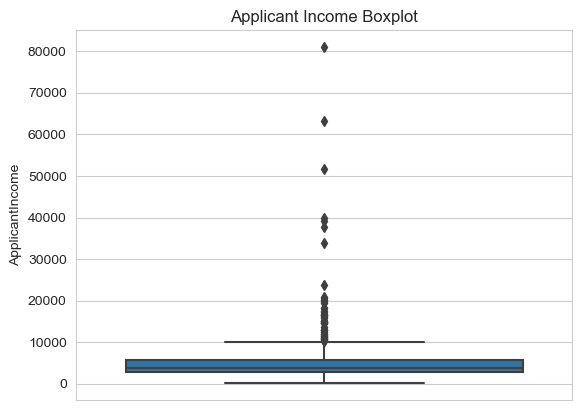

In [247]:
plt.title("Applicant Income Boxplot")
sns.set_style("whitegrid")
sns.boxplot(data=dataset, y='ApplicantIncome')

There is a lot of outliers in this variable "ApplicantIncome", and we'll have to first fix that. 

<Axes: title={'center': 'Applicant Income Distribution'}, xlabel='ApplicantIncome', ylabel='Count'>

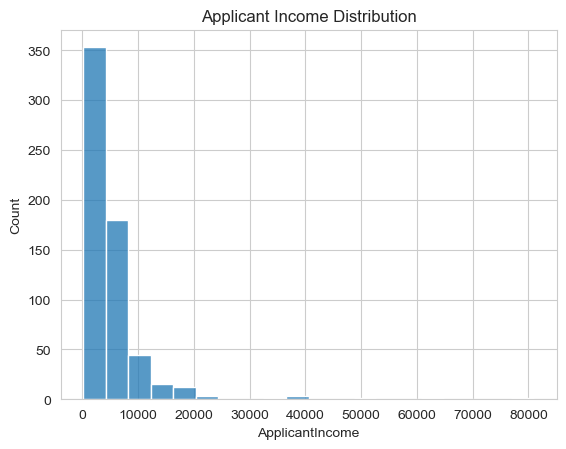

In [248]:
plt.title("Applicant Income Distribution")
sns.histplot(data=dataset, x='ApplicantIncome', bins=20)

<Axes: title={'center': 'CoApplicant Income Distribution'}, xlabel='CoapplicantIncome', ylabel='Count'>

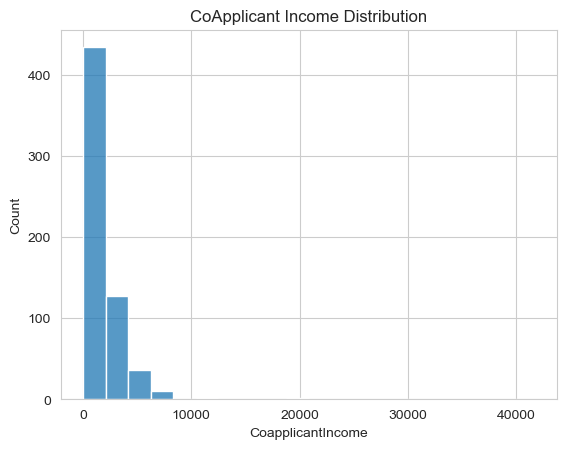

In [249]:
plt.title("CoApplicant Income Distribution")
sns.histplot(data=dataset, x='CoapplicantIncome', bins=20)

We'll have to normalize the variables ApplicantIncome and the CoapplicantIcome so that we remove all the present outliers. 

Text(0, 0.5, 'Applicant Income')

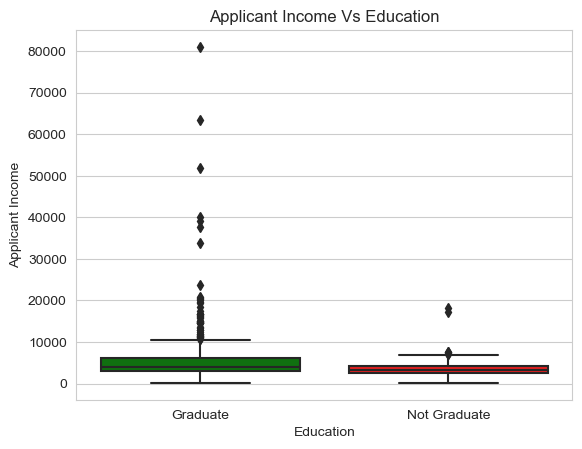

In [250]:
plt.title("Applicant Income Vs Education")
customizedPalette = {'Graduate': "green", 'Not Graduate': "red"}
sns.boxplot(data=dataset, x='Education', y='ApplicantIncome', palette=customizedPalette)
plt.ylabel('Applicant Income')

There is no big difference between the Graduate and Non-graduate income, but some graduate applicants earned bigger incomes comparing to their non-graduate counterparts. 


<Axes: title={'center': 'Loan Amount Boxplot'}, ylabel='LoanAmount'>

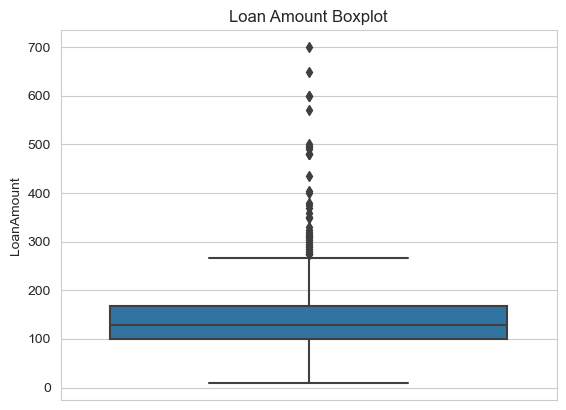

In [251]:
plt.title("Loan Amount Boxplot")
sns.set_style("whitegrid")
sns.boxplot(data=dataset, y='LoanAmount')

There is also a lot of outlier

<Axes: title={'center': 'Loan Amount Distribution'}, xlabel='LoanAmount', ylabel='Count'>

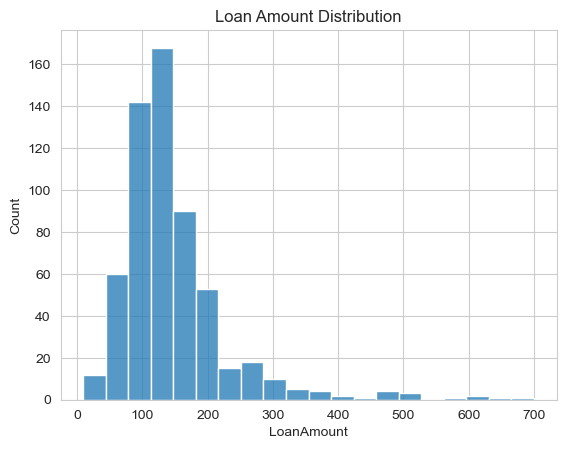

In [20]:
plt.title("Loan Amount Distribution")
sns.histplot(data=dataset, x='LoanAmount', bins=20)

###### Normalizing the data using numpy log function

<Axes: title={'center': 'Loan Amount Normalized Distributions'}, xlabel='LoanAmount_log', ylabel='Count'>

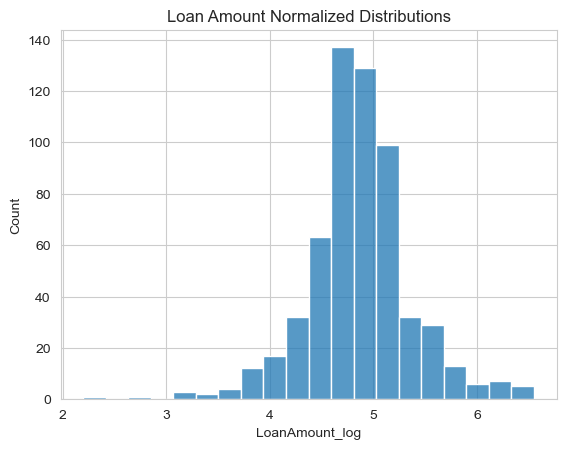

In [21]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])

plt.title("Loan Amount Normalized Distributions")
sns.histplot(data=dataset, x='LoanAmount_log', bins=20)

### Handling Missing Values

In [22]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

##### For categorical data we use mode (Frequently appeared)

In [23]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)

In [24]:
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)

In [25]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)

In [26]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)

In [27]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)

In [28]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

##### For numerical values we use mean to handle missing values

In [29]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)
dataset['LoanAmount_log'].fillna(dataset['LoanAmount_log'].mean(), inplace=True)

In [30]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

We have sucessfully handled the missing values

##### Normalizing the ApplicantIncome and the CoapplicantIncome

In [31]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_log'] = np.log(dataset['ApplicantIncome'])

<Axes: title={'center': 'Total Income Normalized Distribution'}, xlabel='TotalIncome_log', ylabel='Count'>

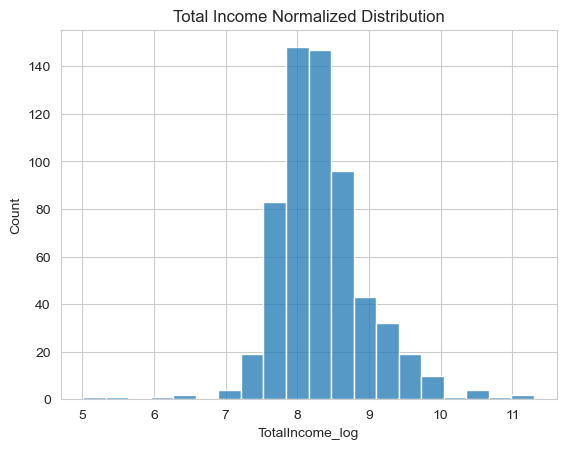

In [32]:
plt.title("Total Income Normalized Distribution")
sns.histplot(data=dataset, x='TotalIncome_log', bins=20)

### Looking at our dataset after handling missing values and normalizing necessary values

In [33]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


### Dividing dataset into dependent and independent variables for our ML model building

In [34]:
X = dataset.iloc[:, [1, 2, 3, 4, 9, 10, 13, 14]].values
y = dataset.iloc[:,12]

#### Splitting our data into test and train datasets
I'll use 80% for training my model, and 20% for testing my model.

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
# Randomstate equal zero avoids difference in results when we do multile runs/tests

In [140]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [137]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,1,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,1,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.430109
2,LP001005,Male,Yes,0,1,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,0,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,7.856707
4,LP001008,Male,No,0,1,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [136]:
# Checking the data types of our attributes to know the categorical and non-categorical
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education              int64
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

##### I'll need to convert the categorical data into 1s and 0s for our system to understand (numeric format) using LabelEncoder. 

In [141]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()  #created instance of labelencoder

In [142]:
# Transforming categorical cols from 0 to 4 indexes.
for i in range(0,5):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])   ## A bug to fix for transforming to numeric values


In [143]:
X_train[:,7] = labelencoder_X.fit_transform(X_train[:,7])

In [144]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

###### Our text values have now been successfully converted to numerical values.

In [145]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [146]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

###### Our y_train is converted to numerical values as well
Next, I'll convert all the other remaining text values to numeric values

In [147]:
# converting the values for the X_test to numerical values zeros and ones

for i in range(0,5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])   ## A bug to fix for transforming to numeric values

In [148]:
X_test[:,7] = labelencoder_X.fit_transform(X_test[:,7])

In [149]:
X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

###### Our X_test is converted as well

In [150]:
y_test = labelencoder_y.fit_transform(y_test)

In [151]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

###### y_test is converted successfully as well

#### Scaling our data for a better analysis and prediction

In [152]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

##### After doing all the preprocessing, from handling the outliers, handling the missing values, to scaling my data. I'll move to creating and plugging my data into the algorithm

In [153]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [157]:
y_pred = DTClassifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [158]:
from sklearn import metrics
print("The accuracy of the decision tree is: ", metrics.accuracy_score(y_pred, y_test))

The accuracy of the decision tree is:  0.7073170731707317


### Let's try another Alorithm to compare which one has high accuracy

In [159]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [162]:
y_pred = NBClassifier.predict(X_test)

Let's see the predictions using Bayes algorithm

In [164]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

#### Let's see how accurate the Naive Bayes algorithm can be

In [165]:
print("The accuracy of Naive Bayes is: ", metrics.accuracy_score(y_pred, y_test))

The accuracy of Naive Bayes is:  0.8292682926829268


##### The accuracy is much better than the tree algorihm, so I am sticking to this for my prediction model

I'll import my test data without whether the person was granted loan or not (without loan_status so that I'll use my model to predict. 

In [182]:
testdata = pd.read_csv('test.csv')

In [183]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


##### Before all, I need to explore my data a bit further to see if there no missing values, or anything that can cause some issues

In [185]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [186]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

###### 'll go ahead and handle some of the missing values present

In [187]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0], inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0], inplace=True)

In [188]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

I have now handles the missing values, except for the non-categorical "LoanAmount" with 5 missing values. 

<Axes: title={'center': 'Loan Amount Visualization'}, ylabel='LoanAmount'>

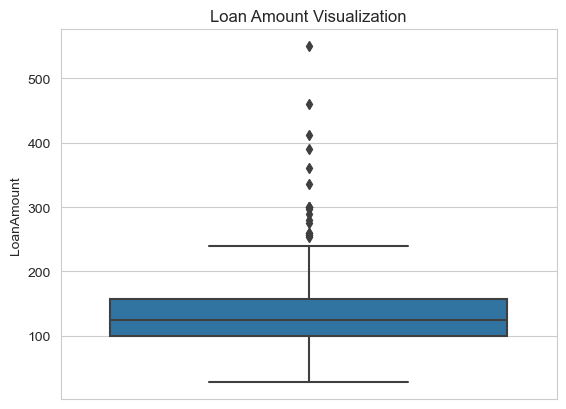

In [200]:
# checking for any outliers in the LoanAmount using boxplot
plt.title("Loan Amount Visualization")
sns.boxplot(data=testdata, y='LoanAmount')

We have some outliers

In [201]:
# handling missing values for LoanAmount
testdata['LoanAmount'] = testdata['LoanAmount'].fillna(testdata.LoanAmount.mean())

In [204]:
# Normalizing the LoanAmount to remove the outliers
testdata['LoanAmount_log'] = np.log(testdata.LoanAmount)

In [206]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

#### No more missing values now !!

Later, I'll need to create a total_income for the applicant and coapplicant similar to what I had while training my model

In [207]:
testdata['TotalIncome'] = testdata['ApplicantIncome'] + testdata['CoapplicantIncome']

#Normalizing my data for totalincome
testdata['TotalIncome_log'] = np.log(testdata.TotalIncome)

In [209]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [211]:
# Selecting the values I need for my model test

test = testdata.iloc[:, [1, 2, 3, 4, 9, 10, 13, 14]].values

#### Converting my selected data to numeric values

In [212]:
for i in range(0,5):
    test[:,i] = labelencoder_X.fit_transform(test[:,i]) 

In [213]:
test[:,7] = labelencoder_X.fit_transform(test[:,7])

In [214]:
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

### For now I'm going to scale my data for better results and accuracy

In [215]:
test = ss.fit_transform(test)

I'll check my prediction now using my test

In [219]:
pred2 = NBClassifier.predict(test)

In [220]:
pred2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

##### Interpreting my predicted values
1 represents that the applicant is eligible for the loan and 0 for that the applicant is not eligible for the loan. 